In [64]:
# Mohammad Ali Zahir
# Student ID: 40077619
# COMP 333 - Data Analytics
# Objective: apply Python and pandas for data wranglingllustrate their use within the notebook.
# Output: Show how the data wrangling works

# Librairies

In [65]:
import pandas as pd
import seaborn as sns

# Loading the dataset

In [66]:
clean_df = pd.read_csv('./data/Portal_rodents_19772002_scinameUUIDs.csv', encoding = "ISO-8859-1")

clean_df.head()

C:\Users\Ali\AppData\Local\Temp\ipykernel_27364\1422114717.py:1: DtypeWarning: Columns (11,12,13,16,17,18,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  clean_df = pd.read_csv('./data/Portal_rodents_19772002_scinameUUIDs.csv', encoding = "ISO-8859-1")


,survey_id,recordID,mo,dy,yr,period,plot_id,plot,note1,stake,...,tag,note2,ltag,note3,prevrt,prevlet,nestdir,neststk,note4,note5
0,491ec41b-0a80-4ce9-b754-2983c6f38e71,6545,9,18,1982,62.0,4dc16022-f28d-4b9d-9062-c7bc3ad43362,13,13.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,f280bade-4e9b-447d-afe0-9e6d45e6bfb0,5220,1,24,1982,54.0,dcbbd373-c22e-46ef-ae8b-ad88f5cf7475,20,13.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2b1b4a8a-c3e9-4781-a5f9-18b081383876,18932,8,7,1991,162.0,1e87b11b-4795-4f41-bdff-2d5c4412be25,19,13.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D
3,e98e66c4-514b-45f7-9d95-336c05a72b21,20588,1,24,1993,179.0,91829d58-c12e-47e8-ae31-185f46be21d2,12,13.0,41.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,768cdd0d-93bc-4c74-9dcd-d1ed48b7501e,7020,11,21,1982,63.0,f24f2db6-eadd-4de9-9d2f-95aea376c013,24,13.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Functions for data wrangling

## Step 1: String Processing

In [67]:
# Create a function which applies remove whitespace and the start and at the front and removes internal whitespace

def string_processing(df):
  # select all columns that have string data type
  object_cols = df.select_dtypes(include=['object']).columns

  # apply strip method to each string column
  df[object_cols] = df[object_cols].apply(lambda x: x.str.strip())

  # replace internal whitespace with a single space
  df[object_cols] = df[object_cols].replace('\s+', ' ', regex=True)

## Step 2: Creating different facets for variables

In [68]:
# Create a function which returns the values for all the columns and then sorts them
def text_facet(df, column: str):
    return df[column].value_counts().sort_index()

In [69]:
# Previewing the function fo the scientific name column with the string not being processed

text_facet(clean_df, 'scientificName')


  Amphispiza bilineata                 1
  Amphispiza bilineata                 1
Ammodramus savannarum                  2
Ammospermophilis harrisi               1
Ammospermophilus harrisi             435
Ammospermophilus harrisii              1
Amphespiza bilineata                   7
Amphispiza bilineata                 289
Amphispiza bilineatus                  1
Amphispiza cilineata                   1
Amphispizo bilineata                   1
Baiomys taylori                       46
Calamospiza melanocorys                1
Callipepla squamata                    1
Campylorhynchus brunneicapillus        1
Chaetodipus baileyi                    2
Cnemidophorus tigris                   1
Cnemidophorus uniparens                1
Crotalus scutalatus                    1
Crotalus viridis                       1
Dipodomys merriami                 10596
Dipodomys ordii                     3027
Dipodomys spectabilis               2504
Dipodomys sp.                         40
Emphispiza bilin

In [70]:
# Applying the string processing function to the dataframe
string_processing(clean_df)

In [71]:
# Previewing the function fo the scientific name column with the string processed

text_facet(clean_df, 'scientificName')


Ammodramus savannarum                  2
Ammospermophilis harrisi               1
Ammospermophilus harrisi             435
Ammospermophilus harrisii              1
Amphespiza bilineata                   7
Amphispiza bilineata                 291
Amphispiza bilineatus                  1
Amphispiza cilineata                   1
Amphispizo bilineata                   1
Baiomys taylori                       46
Calamospiza melanocorys                1
Callipepla squamata                    1
Campylorhynchus brunneicapillus        1
Chaetodipus baileyi                    2
Cnemidophorus tigris                   1
Cnemidophorus uniparens                1
Crotalus scutalatus                    1
Crotalus viridis                       1
Dipodomys merriami                 10596
Dipodomys ordii                     3027
Dipodomys sp.                         40
Dipodomys spectabilis               2504
Emphispiza bilinata                    2
Onychomys leucogaster               1006
Onychomys sp.   

In [120]:
def numeric_facet(df, column, use_log_scaling=False):
    # Check if the column is a numeric column
    if df[column].dtype.kind in 'iufc':
        # Use the text_facet function to clean up the column values
        updated_df = text_facet(df, column)
        # Use sns.histplot to create a histogram of the column values, x is column value here so we use log_scaling == False
        sns.histplot(df, x=column, log_scale=(False, use_log_scaling), hue=column, legend= False)
        # Print the cleaned up column values
        print(f"The column {column} has the following values:")
        print(updated_df)
    else:
        # Print an error message if the column is not a numeric column
        print(f"The column {column} is not a numeric column")


The column yr has the following values:
1977     503
1978    1048
1979     719
1980    1415
1981    1472
1982    1978
1983    1673
1984     981
1985    1438
1986     942
1987    1671
1988    1469
1989    1569
1990    1311
1991    1347
1992    1038
1993     750
1994     668
1995    1222
1996    1706
1997    2493
1998    1610
1999    1135
2000    1552
2001    1610
2002    2229
Name: yr, dtype: int64


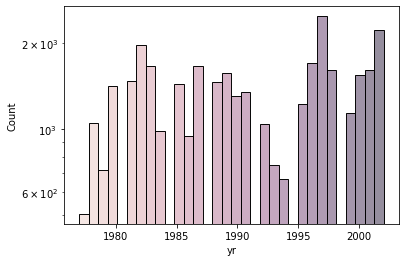

In [121]:
# Trying out the value on a numeric column such as yr 
numeric_facet(clean_df, 'yr', True)